In [1]:
import sys
# sys.path.append('/global/u1/c/cheliu/cliu_repo/heptrkx-gnn-tracking/heptrkx')
# from heptrkx import *
# import os,sys,inspect
# currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
# parentdir = os.path.dirname(currentdir)
# sys.path.insert(0,parentdir) 

# print(sys.path)
from heptrkx import master
from heptrkx.nx_graph import utils_plot, utils_data
from heptrkx.preprocess import utils_mldata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from pandas import DataFrame
import numpy as np
import networkx as nx
from scipy.cluster.vq import vq, kmeans, whiten
import copy
import math
print(utils_plot.__file__)

/global/u1/c/cheliu/heptrkx/heptrkx/nx_graph/utils_plot.py


In [2]:
# Construct event
source_dir = '../data/'
evtid = 21000
event = master.Event(source_dir, evtid)
event.read(evtid)
event.remove_noise_hits()

,hit_idx,hit_id,x,y,z,volume_id,layer_id,module_id,evtid,particle_id,...,q,nhits,pt,layer,r,phi,eta,r3,absZ,tpt
0,0,1,-86.796204,-14.730400,-1502.5,7,2,1,21000,238697583478833152,...,-1.0,16.0,0.255939,0,88.037300,-2.973482,-3.531134,1505.077026,1502.5,0.256832
1,1,2,-68.703499,-10.899000,-1502.5,7,2,1,21000,671044522095935488,...,-1.0,14.0,0.532420,0,69.562630,-2.984266,-3.766317,1504.109497,1502.5,0.537899
2,2,3,-56.138302,-9.508870,-1502.5,7,2,1,21000,774632811083595776,...,1.0,11.0,1.060757,0,56.937927,-2.973802,-3.966414,1503.578491,1502.5,1.064789
3,3,4,-60.311401,-4.972310,-1502.5,7,2,1,21000,945760182355361792,...,-1.0,13.0,1.182979,0,60.516022,-3.059335,-3.905516,1503.718262,1502.5,1.185194
4,4,5,-89.405701,-8.816870,-1502.5,7,2,1,21000,837680800685096960,...,1.0,13.0,1.405517,0,89.839394,-3.043294,-3.510903,1505.183472,1502.5,1.399522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125569,125569,125570,-884.635986,117.088997,2944.5,18,12,97,21000,45036683468472320,...,1.0,16.0,0.345542,47,892.351196,3.009999,1.909190,3076.746826,2944.5,0.331936
125571,125571,125572,-752.166016,71.006104,2944.5,18,12,97,21000,18015223143202816,...,1.0,13.0,1.239737,47,755.510132,3.047469,2.069515,3039.880859,2944.5,1.266754
125572,125572,125573,-826.395996,51.579300,2944.5,18,12,97,21000,391826086842859520,...,-1.0,11.0,1.609889,47,828.004089,3.079259,1.981031,3058.704102,2944.5,1.556278
125573,125573,125574,-884.333008,118.041000,2952.5,18,12,98,21000,45036683468472320,...,1.0,16.0,0.345542,47,892.176331,3.008897,1.911974,3084.353271,2952.5,0.332050


In [3]:
event_hits = event.hits
event_truth = event.truth
event_particles = event.particles



In [4]:
particles = np.unique(event.particles[(event.particles.nhits > 5) & (event.particles.pt > 0.5) ].particle_id)[0:1000]
print(len(particles))
# event.hits.particle_id

1000


In [5]:
event_hits[event_hits.particle_id==particles[0]]

,hit_idx,hit_id,x,y,z,volume_id,layer_id,module_id,evtid,particle_id,...,q,nhits,pt,layer,r,phi,eta,r3,absZ,tpt
22384,22384,22385,-9.576100,-30.949200,39.552200,8,2,116,21000,4503668346847232,...,-1.0,11.0,1.673555,7,32.396832,-1.870867,1.029263,51.126617,39.552200,1.672774
32033,32033,32034,-20.883200,-69.152901,80.733398,8,4,263,21000,4503668346847232,...,-1.0,11.0,1.673555,8,72.237328,-1.864074,0.962143,108.333344,80.733398,1.672408
39181,39181,39182,-32.667099,-111.300003,125.936996,8,6,427,21000,4503668346847232,...,-1.0,11.0,1.673555,9,115.994957,-1.856284,0.940701,171.216110,125.936996,1.672734
46139,46139,46140,-46.519001,-164.360992,182.634995,8,8,718,21000,4503668346847232,...,-1.0,11.0,1.673555,10,170.817307,-1.846612,0.929457,250.068176,182.634995,1.671469
46147,46147,46148,-46.960899,-166.162003,184.548004,8,8,719,21000,4503668346847232,...,-1.0,11.0,1.673555,10,172.670609,-1.846234,0.929186,252.731277,184.548004,1.671347
79677,79677,79678,-66.340599,-248.923996,272.399994,13,2,529,21000,4503668346847232,...,-1.0,11.0,1.673555,24,257.612579,-1.831252,0.921386,374.921326,272.399994,1.668811
87081,87081,87082,-87.199097,-353.285004,382.600006,13,4,796,21000,4503668346847232,...,-1.0,11.0,1.673555,25,363.887329,-1.812783,0.917273,528.012085,382.600006,1.669320
93927,93927,93928,-108.494003,-488.476990,524.000000,13,6,1187,21000,4503668346847232,...,-1.0,11.0,1.673555,26,500.380585,-1.789355,0.914360,724.539001,524.000000,1.669208
100370,100370,100371,-125.070000,-645.872009,687.400024,13,8,1757,21000,4503668346847232,...,-1.0,11.0,1.673555,27,657.870178,-1.762074,0.912760,951.478821,687.400024,1.668076
116879,116879,116880,-132.837006,-813.583984,861.799988,17,2,2187,21000,4503668346847232,...,-1.0,11.0,1.673555,40,824.357056,-1.732642,0.913129,1192.587036,861.799988,1.668451


In [6]:
# event.hits.particle_id.isin(particles)

# whether each particle is in fifteen_particles:
# event.hits.particle_id.isin(fifteen_particles)
hits = event.hits[event.hits.particle_id.isin(particles)]

# filter out all particles with less than 2 hits:
# hits = hits[event.hits.nhits > 5]
# particle
# hits


In [7]:
# hits.hit_id[21014]
hits = hits.sort_values(by=['r3'])

Create the graph G based on the hits dataframe

In [8]:
G = nx.Graph()

for hit_idx, row in hits.iterrows():
    G.add_node(row['hit_id'], particle_id=row['particle_id'], pos=[row['r'], row['phi'], row['z']],\
               volume_id=row['volume_id'], layer_id=row['layer_id'])


# iterate through r
paths = {}# paths is a dictionary
for index, row in hits.iterrows():
    hit_id = row['hit_id']
    particle_id = row['particle_id']
    if particle_id not in paths:
        # initiate a new path (list of hit_id)
        paths[particle_id] = []
    paths[particle_id].append(hit_id)
# print(paths)

# for everything in paths, add edge to G
counter = 0
for path in paths: 
#     print(path)
#     print(paths[path])
    prev_hit = paths[path][0]
    for hit in paths[path]:
        if prev_hit != hit:
            G.add_edge(prev_hit, hit, solution=np.array([1]))
        prev_hit = hit



In [9]:
"""Split a graph G equally into N phi bins
Args:   G: a graph
        HITS: a pandas dataframe of hits
        N: number of phi bins
Return: a list of subgraphs that starts from phi = -pi, ordered in counter clockwise direction
Theta(hits)

TODOS: Use boundary instead of integer division. May have rounding issue
"""
def split_graph_by_phi(G, hits, n=4):
    
    width = np.pi * 2 / n
    
    phi_bins = [[] for i in range(n)]        
    
    for index, row in hits.iterrows():
        phi = row['phi']

        bin_index = int((phi + np.pi) // width)
        # the zeroth bin starts at phi = -pi, clockwise
        phi_bins[bin_index].append(row['hit_id'])
        
    return [nx.subgraph(G, phi_bin) for phi_bin in phi_bins]

In [10]:
""" Plot all graphs in graph_list
"""
def plot_graphs(graph_list):
    for graph in graph_list:
        utils_plot.plot_networkx(graph)
        

In [11]:
""" Returns the number of connected segments in G
"""
def get_num_of_segments(G):
    return len([x for x in nx.connected_components(G)])

In [12]:
""" Create a composition graph of the graphs from different phi bins

    ARGS: G: a graph
        hits: a pandas dataframe of hits
        sect: number of phi bins
"""
def make_G_joint_from_graph_list(G, hits, sect, print_enabled=False):
    splitted_graphs_list = split_graph_by_phi(G, hits, n=sect)
    G_joint = nx.compose_all(splitted_graphs_list)
    
    total_edges = 0
    for graph in splitted_graphs_list:
        total_edges += len(graph.edges())
        
    
#     plot_graphs(splitted_graphs_list)
#     plot_graphs([G_joint])
#     plot_graphs([G])


    if print_enabled:
        print("edge count in G_joint: {}".format(len(G_joint.edges())))
        print("node count in G_joint: {}".format(len(G_joint.nodes())))
        print("edge count in G: {}".format(len(G.edges())))
        print("node count in G: {}".format(len(G.nodes())))
        print("edges removed: {}".format(len(G.edges()) - len(G_joint.edges())))
        print("total edges: {}".format(total_edges))
        
        print()

        print("number of connected componnets in G: {}".format(get_num_of_segments(G)))
        print("number of connected componnets in G_joint: {}".format(get_num_of_segments(G_joint)))
        print('The difference between the above two numbers must be equal to the number of edges removed')

    return G_joint 

In [13]:
""" Part 1:
    Return the number of connected segments after G is splitted into N phi bins
"""

def get_num_of_segments_after_split(G, hits, n):
    G_joint = make_G_joint_from_graph_list(G, hits, n)
    return len(list(nx.connected_component_subgraphs(G_joint)))

In [14]:
""" A helper function 
This function computes G - G_joint to return a list of removed edges as graphs
"""
def get_removed_edges_as_graph_list(G, G_joint):
    diff_graph = nx.difference(G, G_joint)
    # add solution. Somehow difference() doesn't copy solution over 
    nx.set_edge_attributes(diff_graph, [1], name='solution')
    removed_edges_subgraphs = list(nx.connected_component_subgraphs(diff_graph))
    removed_edges_subgraphs = list(filter(lambda x: len(x.nodes()) > 1, removed_edges_subgraphs))

#     plot_graphs([diff_graph])
    return removed_edges_subgraphs



In [15]:
""" A helper function
From G and G_joint, construct a a list of unbroken tracks, a list of broken tracks. The elements in 
    two lists pairwisely match.
    
"""
def match_broken_and_unbroken_tracks(G, G_joint):

    removed_edges_subgraphs = get_removed_edges_as_graph_list(G, G_joint)

    # broken_tracks is a list of subgraphs, each of which is a graph with only one connected component
    # unbroken_tracks is the corresponding graphs list but are not missing the edges
    broken_tracks = []
    unbroken_tracks = []
    temp1 = []
    temp2 = []
    for subgraph in removed_edges_subgraphs:
        # for each subgraph, use one of its nodes to get all nodes in the unbroken path from G
        # then from G_joint, get the corresponding broken subgraph.
        nodes = nx.node_connected_component(G, list(subgraph.nodes)[0])
        broken_track = nx.subgraph(G_joint, nodes)

        unbroken_track = nx.subgraph(G, nodes)

        temp2.append(broken_track)
        temp1.append(unbroken_track)

    # remove duplicates: duplicates are caused if a graph is broken into more than 2 component
    # will need to remove them

    """returns whether GRAPH is in GRAPH_LIST"""
    def graph_in_list(graph, graph_list):
        for g in graph_list:
            if not utils_data.is_diff_networkx(graph, g):
                return True        
        return False

    for graph in temp2:
        if not graph_in_list(graph, broken_tracks):
            broken_tracks.append(graph)

    for graph in temp1:
        if not graph_in_list(graph, unbroken_tracks):
            unbroken_tracks.append(graph)

    # now broken_tracks should have no duplicates

    # plot_graphs(broken_tracks)

#     print("number of broken components: {}".format(len(broken_tracks)))

#     print("number of edges removed: {}".format(len(removed_edges_subgraphs)))

#     plot_graphs([broken_tracks[1]])
#     plot_graphs([unbroken_tracks[1]])
    
    return broken_tracks, unbroken_tracks
    

In [16]:
""" ALL_BROKEN_TRACKS is a dictionary that uses particle_id as key, a tuple of the unbroken version of the track 
and a list of broken segments as values
    ARGS: G: original graph
        G_joint: the composed graph of subgraphs from different phi bins
    RETURNS: ALL_BROKEN_TRACKS: a dictionary where key== particle_id, val == (unbroken_track, list of broken_tracks)
"""
def all_broken_segments_in_graph(G, hits, n):
    G_joint = make_G_joint_from_graph_list(G, hits, n)
    all_broken_tracks = {}
    broken_tracks, unbroken_tracks = match_broken_and_unbroken_tracks(G, G_joint)
    for g1, g2 in zip(unbroken_tracks, broken_tracks):

        # turn g2 into a list of disjoint components as graphs
        # pair = (original_segment, [broken_segment1, broken_segment2, ...])
        particle_id = list(g1.nodes('particle_id'))[0][1]
        all_broken_tracks[particle_id] = (g1, list(nx.connected_component_subgraphs(g2)), g2)

#     print(len(all_broken_tracks))
#     print(all_broken_tracks)
    return all_broken_tracks


Group all segments that come from the same track in 

In [17]:
""" A helper function
a function that takes in a segment (segment is a graph with only 1 connected component) 
and outputs its tracking parameters
    if the segments contains less or equal to 1 hit points, then return None.
"""
def fit_tracks_in_graph(segment):
    
    def cylindrical_to_cartesian(pos):
        x = pos[0] * np.cos(pos[1])
        y = pos[0] * np.sin(pos[1])
        return x, y, pos[2]
    
    
    track_parameters = []
    # node attribute has hit_id, pos=[r,phi,z]
#     connected_components = list(nx.connected_components(graph))
#     for component in connected_components:
#         path = nx.subgraph(graph, component)    # path is a graph containing only one connected component
    x, y, z = [], [], []
    for n in segment.nodes.data():       
        cartesian_pos = cylindrical_to_cartesian(n[1]['pos'])
        x.append(cartesian_pos[0])
        y.append(cartesian_pos[1])
        z.append(cartesian_pos[2])
        
    # only fit tracks with more than 2 nodes:
    if len(np.array(x)) > 2:            
        p = utils_mldata.get_track_parameters(np.array(x), np.array(y), np.array(z))
        return p
    else:
        return None

In [18]:
""" PART 3: 
Compute a dictionary storing the tracking parameters of tracks and its segments
    ARGS: all_broken_tracks: a dictionary with key == particle_id, val = (unbroken_track, list of broken_tracks)
    stored as graphs
    
    RETURN: a dictionary with key == particle_id, val = (unbroken_track_params, list of broken_tracks_params)
"""
def calc_tracking_params_from_all_broken_tracks(all_broken_tracks):
    track_params_dict = {}
    for item in all_broken_tracks.items():
        key = item[0]
        unbroken_track = item[1][0]
        
        # broken_tracks is a list of graph segments
        broken_tracks = item[1][1]
        
        unbroken_track_params = fit_tracks_in_graph(unbroken_track)
        
        broken_tracks_params = [fit_tracks_in_graph(track) for track in broken_tracks if fit_tracks_in_graph(track)]
        track_params_dict[key] = (unbroken_track_params, broken_tracks_params)
    return track_params_dict
    

In [38]:
# n is the number of phi regions
n = 4

"""Part I:"""
num_of_segments = get_num_of_segments_after_split(G, hits, n)

"""Part II:"""
all_broken_tracks = all_broken_segments_in_graph(G, hits, n)

"""Part III:"""
all_tracking_params = calc_tracking_params_from_all_broken_tracks(all_broken_tracks)


"""Display: """
print("num_of_segments after splitted by {} phi bins:".format(n))
print(num_of_segments)

print("original num_of_segments:")
print(get_num_of_segments(G))

print()
print("all_tracking_params in format {key=particle_id, (unbroken_param, list_of_broken_params)}")
print()

print(all_tracking_params)


num_of_segments after splitted by 4 phi bins:
1143
original num_of_segments:
1000

all_tracking_params in format {key=particle_id, (unbroken_param, list_of_broken_params)}

{4504424261091328.0: ((0.04041301692586785, 6.451444995930818, -1.5447750036061314, 0.12315715403101761, 1.051992144385232), [(0.42846670409835497, 6.031902098733762, 1.580773339890063, 0.12780972309381372, 1.9364024512029114), (0.16547361899642965, 6.785219171175715, -1.5442722116208143, 0.12266727061966523, 1.0504907333700053)]), 5.855023112965325e+16: ((0.5143740992489256, -61.62362411576476, 1.6016149309979053, -0.24244705309806613, 0.59037176576427), [(0.872817659817656, -61.0382688834339, 1.602941556612953, -0.24063685898439638, 0.5891328506715104), (10.829385778583458, -65.05068713011805, -2.1913286086978694, -0.37545164713991974, -0.027914486607494064)]), 9030495157354496.0: ((5.310296693898408, -70.92958360465532, 1.5092438579552607, -0.9105609640051797, 0.7326450530639167), [(5.25702180140479, -70.21641076

In [ ]:
((0.04041301692586785, 6.451444995930818, -1.5447750036061314, 0.12315715403101761, 1.051992144385232), 
 [(0.42846670409835497, 6.031902098733762, 1.580773339890063, 0.12780972309381372, 1.9364024512029114), 
  (0.16547361899642965, 6.785219171175715, -1.5442722116208143, 0.12266727061966523, 1.0504907333700053)])


In [42]:
jjj = math.sqrt((1.580773339890063-1.5442722116208143)**2 + (0.12780972309381372-0.12266727061966523)**2 + (1.9364024512029114 - 1.0504907333700053)**2)
print(jjj)

0.8866782668905491


In [20]:
all_tracking_params[4504424261091328.0]

((0.04041301692586785,
  6.451444995930818,
  -1.5447750036061314,
  0.12315715403101761,
  1.051992144385232),
 [(0.42846670409835497,
   6.031902098733762,
   1.580773339890063,
   0.12780972309381372,
   1.9364024512029114),
  (0.16547361899642965,
   6.785219171175715,
   -1.5442722116208143,
   0.12266727061966523,
   1.0504907333700053)])

/global/homes/c/cheliu/.conda/envs/heptrkx/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/global/homes/c/cheliu/.conda/envs/heptrkx/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


edge count in G_joint: 10513
node count in G_joint: 11787
edge count in G: 10787
node count in G: 11787
edges removed: 274
total edges: 10513

number of connected componnets in G: 1000
number of connected componnets in G_joint: 1274
The difference between the above two numbers must be equal to the number of edges removed



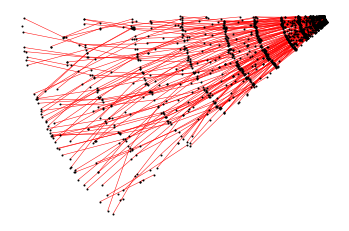

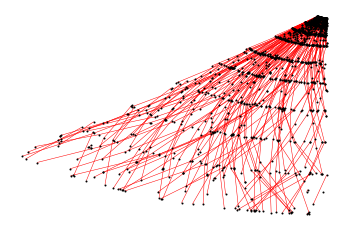

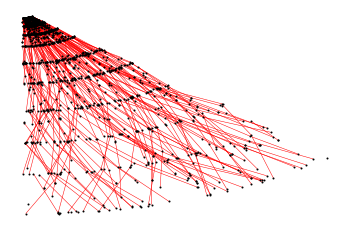

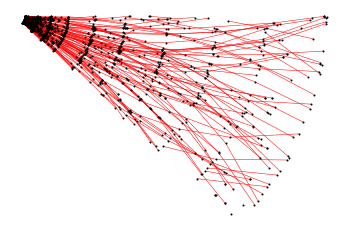

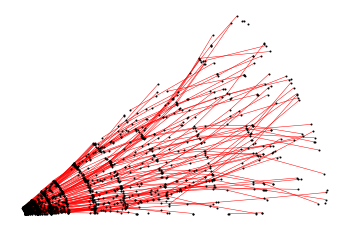

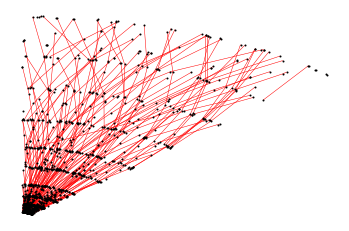

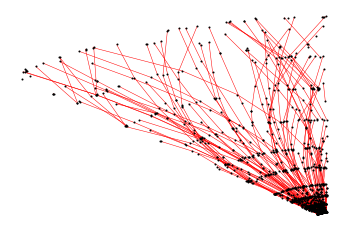

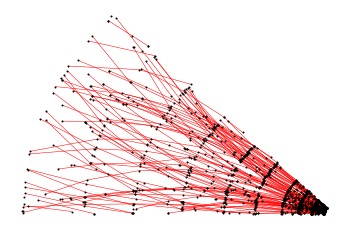

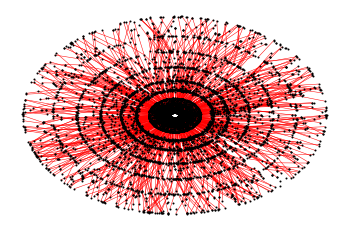

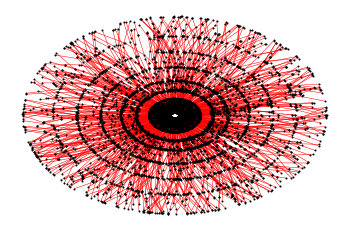

In [21]:
# %matplotlib inline

plot_graphs(split_graph_by_phi(G, hits, 8))
G_joint = make_G_joint_from_graph_list(G, hits, 8, print_enabled=True)
plot_graphs([G_joint])
plot_graphs([G])
print()
# print("all_broken_tracks:")
# print(all_broken_tracks)

In [36]:
"Ploting the last three components of tracking params"

'Ploting the last three components of tracking params'

In [37]:
nx.__version__

'2.3'

In [23]:
np.random.ranf()

0.354037438737158

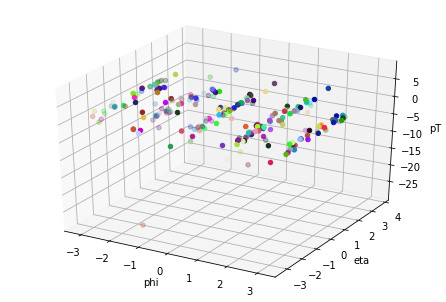

In [24]:
fig = plt.figure()
ax = Axes3D(fig)
Phi = []
phi, eta, pT = [], [], []

colors = [(np.random.ranf(), np.random.ranf(), np.random.ranf()) for i in range(len(all_tracking_params))]
# print(colors)

i = 0
counter = 0
for item in all_tracking_params.items():
#     print(value[0])
    particle_id = item[0]
    value = item[1]
    
    for track_params in value[1]:
        phi.append(track_params[2])
        eta.append(track_params[3])
        pT.append(track_params[4])
        
        Phi.append(track_params[2])
        counter +=1
    ax.scatter(phi, eta, pT, color=colors[i])
    phi, eta, pT = [], [], []
    i+=1

ax.set_xlabel('phi')
ax.set_ylabel('eta')
ax.set_zlabel('pT')
plt.show()


234


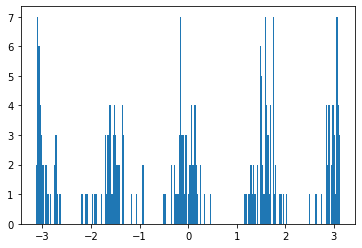

In [25]:
# phi distribution of broken tracks only

print(counter)
plt.hist(Phi, counter)
plt.show()

In [26]:
""" plotting unbroken and broken tracks"""

' plotting unbroken and broken tracks'

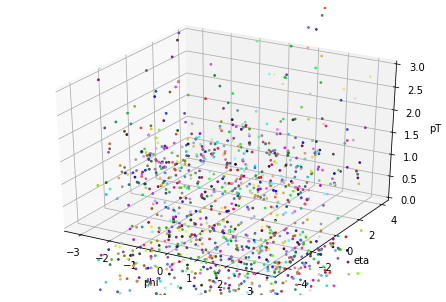

In [27]:
# phi, eta, pT are lists of tracking parameters 
phi, eta, pT = [], [], []
PHI = []
counter = 0
for segment in nx.connected_component_subgraphs(G_joint):
    tracking_params = fit_tracks_in_graph(segment)
    if tracking_params:
        phi.append(tracking_params[2])
        eta.append(tracking_params[3])
        pT.append(tracking_params[4])
        PHI.append(tracking_params[2])
        counter += 1
        
colors = [(np.random.ranf(), np.random.ranf(), np.random.ranf()) for i in range(counter)]

fig2 = plt.figure()
ax2 = Axes3D(fig2)
ax2.scatter(phi, eta, pT, c=colors, s=3)
ax2.set_xlabel('phi')
ax2.set_ylabel('eta')
ax2.set_zlabel('pT')
ax2.set_zlim3d(0,3)
plt.show()

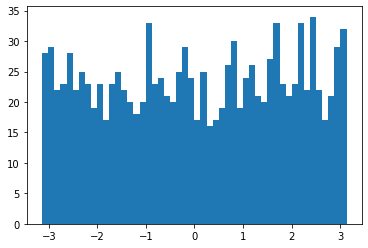

In [28]:
plt.hist(PHI, 50)
plt.show()

In [29]:
""" For each track, find the track that is closest to it. Plot histogram, number of tracks for each minimum 
    distance
"""

' For each track, find the track that is closest to it. Plot histogram, number of tracks for each minimum \n    distance\n'

In [43]:
""" A helper function that takes in two tracking parameters in fomat (phi, eta, pT) and compute their eulerian
    distance
"""
def euler_distance(params1, params2):
    return math.sqrt((abs(params1[0])-abs(params2[0]))**2 + (params1[1]-params2[1])**2 + (params1[2]-params2[2])**2)

In [44]:
params_list = list(zip(phi, eta, pT))
min_distance_list = []

for params1 in params_list:
    
    min_distance = float('inf')
    
    dists = [euler_distance(params1, params2) for params2 in params_list if params2 != params1]
    
    # filter out the outlier
    if min(dists) < 2:
        min_distance_list.append(min(dists))
# print(min_distance_list)

0.006559729227461335


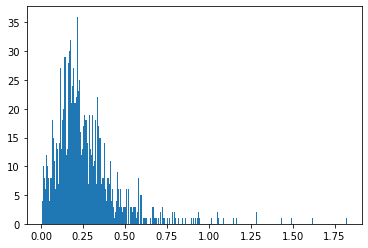

In [45]:
print(min(min_distance_list))
plt.hist(min_distance_list, 300)
plt.show()

In [ ]:
def euler_distance_from_list(params):
    dists = []
    for p1 in params:
        for p2 in params:
            if p1 != p2:
                
                dist = euler_distance(p1[2:5], p2[2:5])
#                 print(dist)
                dists.append(dist)
            
    return dists

In [ ]:
def calc_dphi(phi1, phi2):
    """Computes phi2-phi1 given in range [-pi,pi]"""
    dphi = phi2 - phi1
    if dphi > np.pi:
        dphi -= 2*np.pi
    if dphi < -np.pi:
        dphi += 2*np.pi
    return dphi

In [47]:
dists = []
for item in all_tracking_params.items():
    broken_tracks_params = item[1][1]
#     print(broken_tracks_params)
    dists.extend(euler_distance_from_list(broken_tracks_params))
    
print(dists)

[0.8866782668905491, 0.8866782668905491, 0.8632043597026757, 0.8632043597026757, 0.1646672862508567, 0.1646672862508567, 2.9806887555679062, 2.9806887555679062, 0.025683219518749204, 0.025683219518749204, 2.992363130658978, 2.992363130658978, 0.12305239486350898, 0.12305239486350898, 0.006559729227461335, 0.006559729227461335, 0.03433353487588938, 0.03433353487588938, 0.07438977583106907, 0.07438977583106907, 0.7247975098751934, 0.7247975098751934, 3.0262897825604167, 3.0262897825604167, 2.8936974512386073, 2.8936974512386073, 0.015159318705597169, 0.015159318705597169, 0.035605701603428484, 0.035605701603428484, 0.13825200238350777, 0.13825200238350777, 0.28944207727941684, 0.28944207727941684, 0.13244625006153268, 0.13244625006153268, 0.14619681962451395, 0.14619681962451395, 0.19881796075820743, 0.19881796075820743, 0.28508763813017907, 0.28508763813017907, 2.8773300684088907, 2.8773300684088907, 2.927348645810087, 2.927348645810087, 0.03792567392865008, 0.03792567392865008, 0.34495

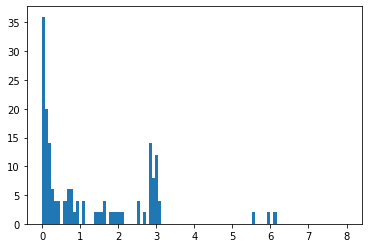

In [51]:
plt.hist(dists, bins=100, range=(0,8))

plt.show()